<a href="https://colab.research.google.com/github/noeffortnomoney/CS114.L22.KHCL/blob/main/Colab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bài tập colab số 03. Dự đoán điểm cuối kỳ của sinh viên IT001 dựa trên kết quả thực hành Wecode

##Cài đặt thư viện

In [60]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


##Wecode.csv

In [19]:
df_wecode = pd.read_csv('/content/drive/MyDrive/wecode.csv')
df_wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [24]:
df_wecode.shape
print('Wecode variables: {}'.format(df_wecode.shape[1]))
print('Wecode rows: {}'.format(df_wecode.shape[0]))
df_wecode.dtypes
df_wecode.info()

Wecode variables: 12
Wecode rows: 264606
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [29]:
df_wecode.describe().T

,count,mean,std,min,25%,50%,75%,max
id,264606.0,132535.074908,76605.695631,4.0,66262.25,132413.5,198566.75,266671.0
assignment_id,264606.0,186.732429,109.768713,0.0,90.00,178.0,286.00,384.0
problem_id,264606.0,257.958074,158.359795,1.0,123.00,298.0,348.00,698.0
user_id,264606.0,935.002147,514.246324,1.0,497.00,925.0,1393.00,1868.0
is_final,264606.0,0.387349,0.487146,0.0,0.00,0.0,1.00,1.0
pre_score,264606.0,5596.454559,4393.183730,0.0,0.00,7000.0,10000.00,10000.0
language_id,264606.0,2.000317,0.025195,2.0,2.00,2.0,2.00,4.0


In [57]:
#Tổng số problem
sub = pd.DataFrame(df_wecode[['user_id','assignment_id','problem_id','is_final','pre_score']])
pl=pd.DataFrame(sub.groupby('assignment_id').problem_id.nunique())
pl.columns=['total_problem']
pl

,total_problem
assignment_id,
0,352
5,4
7,10
8,8
10,7
...,...
376,10
377,7
381,4


In [54]:
#Số problem thử
pl_try = df_wecode.groupby("user_id")["problem_id"].agg(problem_try = "nunique")
pl_try

,problem_try
user_id,
1,2
4,41
5,5
6,88
7,2
...,...
1860,43
1862,6
1864,63


In [33]:
#Số lần nộp bài
submits = df_wecode.groupby("user_id")["id"].count()
submits

user_id
1         2
4        54
5         6
6       130
7         5
       ... 
1860     76
1862     12
1864    187
1865     99
1868     47
Name: id, Length: 1159, dtype: int64

In [44]:
total_score = df_wecode[df_wecode['pre_score'] > 0].groupby('user_id')['pre_score'].sum().reset_index(name='total_score')
print(total_score)

      user_id  total_score
0           1        10000
1           4       466000
2           5        30000
3           6       965637
4           7        18843
...       ...          ...
1140     1860       405440
1141     1862        40000
1142     1864       563292
1143     1865       189460
1144     1868       390000

[1145 rows x 2 columns]


In [59]:
#Tổng hợp dữ liệu thu thập được từ wecode.csv
merge1 = pd.merge(sub, pl_try,
                   on='user_id', 
                   how='inner')  
merge2 = pd.merge(merge1, submits,
                   on='user_id', 
                   how='inner')
merge_wecode = pd.merge(merge2, total_score,
                        on='user_id', 
                        how='inner')
print(merge_wecode)

        user_id  assignment_id  problem_id  ...  problem_try  id  total_score
0             4              0           3  ...           41  54       466000
1             4              0           4  ...           41  54       466000
2             4              0           5  ...           41  54       466000
3             4              0           5  ...           41  54       466000
4             4              0           5  ...           41  54       466000
...         ...            ...         ...  ...          ...  ..          ...
264485     1452            383         313  ...           45  63       460000
264486     1452            383         318  ...           45  63       460000
264487     1452            383         319  ...           45  63       460000
264488     1452            383         317  ...           45  63       460000
264489     1452            383         316  ...           45  63       460000

[264490 rows x 8 columns]


##Score_training.csv

In [52]:
df_score = pd.read_csv('/content/drive/MyDrive/score_training.csv')
df_score = df_score.rename(columns={"id": "user_id", "QT": "QT","GK":"GK","TH":"TH","CK":"CK","TBM":"TBM","TBTL":"TBTL"})
df_score

,user_id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [48]:
df_score.shape
print('Wecode variables: {}'.format(df_score.shape[1]))
print('Wecode rows: {}'.format(df_score.shape[0]))
df_score.dtypes
df_score.info()

Wecode variables: 7
Wecode rows: 975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [47]:
df_score.describe().T

,count,mean,std,min,25%,50%,75%,max
id,975.0,871.44,506.048802,22.0,435.5,851.0,1327.5,1866.0


In [53]:
data_merge = pd.merge(merge_wecode,df_score,on='user_id',how='outer')
data_merge

,user_id,assignment_id,problem_id,is_final,pre_score,problem_tries,id,total_score,QT,GK,TH,CK,TBM,TBTL
0,4,0.0,3.0,1.0,10000.0,41.0,54.0,466000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4,0.0,4.0,1.0,10000.0,41.0,54.0,466000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0.0,5.0,0.0,0.0,41.0,54.0,466000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0,5.0,0.0,0.0,41.0,54.0,466000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,5.0,0.0,0.0,41.0,54.0,466000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264615,1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,,7,,6.22
264616,1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,8.5,9,9,7.29
264617,1757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0,0,0.5,0.3,1.88
264618,1758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1,0,3,1.6,4.03


In [69]:
#Chọn ra các sinh viên có dữ liệu đầy đủ
data_merge.dropna(subset = ['user_id','assignment_id','problem_id','is_final','pre_score','problem_tries','total_score','TH','CK','TBM','TBTL'], inplace=True)
print(data_merge)

        user_id  assignment_id  problem_id  is_final  ...   TH   CK  TBM  TBTL
54         1439            7.0        10.0       0.0  ...  6.5  8.5  7.4  7.41
55         1439            7.0        10.0       0.0  ...  6.5  8.5  7.4  7.41
56         1439            7.0         1.0       0.0  ...  6.5  8.5  7.4  7.41
57         1439            7.0        10.0       0.0  ...  6.5  8.5  7.4  7.41
58         1439            7.0        10.0       0.0  ...  6.5  8.5  7.4  7.41
...         ...            ...         ...       ...  ...  ...  ...  ...   ...
264485     1452          383.0       313.0       1.0  ...    8    6  6.6  7.05
264486     1452          383.0       318.0       1.0  ...    8    6  6.6  7.05
264487     1452          383.0       319.0       1.0  ...    8    6  6.6  7.05
264488     1452          383.0       317.0       1.0  ...    8    6  6.6  7.05
264489     1452          383.0       316.0       1.0  ...    8    6  6.6  7.05

[207441 rows x 14 columns]


Text(0, 0.5, 'Trung bình môn')

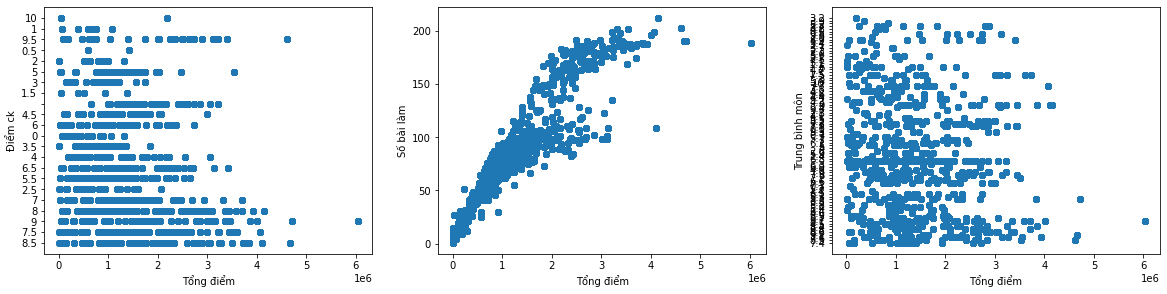

In [77]:
columns = data_merge.columns
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.scatter(data_merge['total_score'], data_merge['CK'])
plt.xlabel('Tổng điểm')
plt.ylabel('Điểm ck')

plt.subplot(232)
plt.scatter(data_merge['total_score'], data_merge['problem_tries'])
plt.xlabel('Tổng điểm')
plt.ylabel('Số bài làm')

plt.subplot(233)
plt.scatter(data_merge['total_score'], data_merge['TBM'])
plt.xlabel('Tổng điểm')
plt.ylabel('Trung bình môn')